## Задача (Sentiment Analysis)

# Задание
Данные берем отызывы за лето
На вебинаре мы говорили, что долгое время CNN и RNN архитектуры были конурируещими выяснить какая архитектура больше подходит для нашей задачи
1. построить свёрточные архитектуры
2. построить различные архитектуры с RNN
3. построить совместные архитектуры CNN -> RNN или (RNN -> CNN)

In [4]:
!wget https://gbcdn.mrgcdn.ru/uploads/asset/2800918/attachment/345557289fb373789308c13ddf55e23f.xls

--2022-06-26 02:44:27--  https://gbcdn.mrgcdn.ru/uploads/asset/2800918/attachment/345557289fb373789308c13ddf55e23f.xls
Resolving gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)... 5.181.61.0
Connecting to gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)|5.181.61.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3596800 (3.4M) [application/CDFV2]
Saving to: ‘345557289fb373789308c13ddf55e23f.xls’

345557289fb37378930 100%[===================>]   3.43M  --.-KB/s    in 0.1s    

2022-06-26 02:44:27 (30.1 MB/s) - ‘345557289fb373789308c13ddf55e23f.xls’ saved [3596800/3596800]



In [1]:
max_words = 20000
max_len = 2000
num_classes = 6

# Training
epochs = 50
batch_size = 512
print_batch_n = 100

In [2]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
import pandas as pd

df=pd.read_excel("345557289fb373789308c13ddf55e23f.xls")

In [6]:
df.head()

,Rating,Content,Date
0,5,It just works!,2017-08-14
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14
2,5,Отлично все,2017-08-14
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14
4,5,"Очень удобно, работает быстро.",2017-08-14


In [ ]:
df.Rating.value_counts(normalize=True)

5    0.706036
1    0.110170
4    0.103490
3    0.044097
2    0.036207
Name: Rating, dtype: float64

In [7]:
df.drop(columns=['Date'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20659 entries, 0 to 20658
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   20659 non-null  int64 
 1   Content  20656 non-null  object
dtypes: int64(1), object(1)
memory usage: 322.9+ KB


In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     train_size=0.8, 
                                     random_state=21, 
                                     #shuffle=True, 
                                     #stratify='new')
                                    )

In [ ]:
df_train.Rating.value_counts(normalize=True)

5    0.707206
1    0.111030
4    0.103467
3    0.042778
2    0.035518
Name: Rating, dtype: float64

### Предобработка

In [10]:
pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=4a68bcef815a07601be87c63069043cf2f6d4d1866d7fc8cd02a220d0ce981ba
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [11]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 8.2 MB 29.6 MB/s 


In [12]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
import re

In [13]:
sw = set(get_stop_words("ru"))
exclude = set(punctuation)
morpher = MorphAnalyzer()

def preprocess_text(txt):
    txt = str(txt)
    txt = "".join(c for c in txt if c not in exclude)
    txt = txt.lower()
    txt = re.sub("\sне", "не", txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    return " ".join(txt)

df_train['Content'] = df_train['Content'].apply(preprocess_text)
df_test['Content'] = df_test['Content'].apply(preprocess_text)

In [14]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D, SimpleRNN, LSTM, GRU, Masking
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard 
#from keras.objectives import categorical_crossentropy
from keras.callbacks import EarlyStopping

In [15]:
text_corpus_train = df_train['Content'].values
text_corpus_test = df_test['Content'].values

In [16]:
tokenizer = Tokenizer(num_words=None, 
                     filters='#$%&()*+-<=>@[\\]^_`{|}~\t\n',
                     lower = False, split = ' ')
tokenizer.fit_on_texts(text_corpus_train)

sequences_train = tokenizer.texts_to_sequences(text_corpus_train)
sequences_test = tokenizer.texts_to_sequences(text_corpus_test)

word_count = len(tokenizer.index_word) + 1
training_length = max([len(i.split()) for i in text_corpus_train])

X_train = pad_sequences(sequences_train, maxlen=training_length)
X_test = pad_sequences(sequences_test, maxlen=training_length)

Оставлю старый код. Новый лень сочинять.

In [37]:
train_corpus = " ".join(df_train["Content"])
train_corpus = train_corpus.lower()

In [38]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Отфильтруем данные

и соберём в корпус N наиболее частых токенов

In [39]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [40]:
from nltk.probability import FreqDist
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]

In [41]:
tokens_filtered_top[:10]

['приложение',
 'удобно',
 'работать',
 'удобный',
 'отлично',
 'нравиться',
 'хороший',
 'отличный',
 'телефон',
 'супер']

In [42]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [43]:
def text_to_len(text):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    return len(result)

In [44]:
x_len = [text_to_len(text) for text in df_train["Content"]]

Выбираю max_len

(array([1.1497e+04, 2.3110e+03, 1.2670e+03, 5.2400e+02, 3.4800e+02,
        2.4600e+02, 1.1400e+02, 6.5000e+01, 5.4000e+01, 2.3000e+01,
        3.8000e+01, 8.0000e+00, 1.5000e+01, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,   4.4,   8.8,  13.2,  17.6,  22. ,  26.4,  30.8,  35.2,
         39.6,  44. ,  48.4,  52.8,  57.2,  61.6,  66. ,  70.4,  74.8,
         79.2,  83.6,  88. ,  92.4,  96.8, 101.2, 105.6, 110. , 114.4,
        118.8, 123.2, 127.6, 132. ]),
 <a list of 30 Patch objects>)

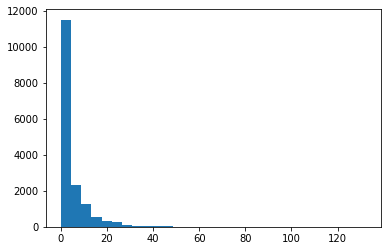

In [45]:
import matplotlib

matplotlib.pyplot.hist(x_len, bins=30)

# Keras model

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard
#from keras.objectives import categorical_crossentropy
from keras.callbacks import EarlyStopping  

In [17]:
from keras.utils.np_utils import to_categorical

In [18]:
df_train["Rating"].value_counts()

5    11688
1     1835
4     1710
3      707
2      587
Name: Rating, dtype: int64

In [19]:
num_classes = 6

y_train = to_categorical(df_train["Rating"], num_classes)
y_test = to_categorical(df_test["Rating"], num_classes)

# CNN

In [ ]:
model = Sequential()

model.add(
    Embedding(input_dim=word_count,
              input_length=training_length,
              output_dim=30,
              trainable=True,
              mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
early_stopping=EarlyStopping(monitor='val_loss')  


history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])


Epoch 1/50
30/30 [==============================] - 15s 475ms/step - loss: 1.3871 - accuracy: 0.6710 - val_loss: 0.9759 - val_accuracy: 0.7175
Epoch 2/50
30/30 [==============================] - 12s 414ms/step - loss: 0.9732 - accuracy: 0.7098 - val_loss: 0.7107 - val_accuracy: 0.7701


In [ ]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 1s 102ms/step - loss: 0.7885 - accuracy: 0.7408


Test score: 0.7884971499443054
Test accuracy: 0.7408034801483154


# GRU

In [28]:
model = Sequential()

model.add(
    Embedding(input_dim=word_count,
              input_length=training_length,
              output_dim=30,
              trainable=True,
              mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(GRU(128, recurrent_dropout=0.2, return_sequences = True))
model.add(Activation("relu"))
model.add(GRU(128, recurrent_dropout=0.2))
model.add(Activation("relu"))
#model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
early_stopping=EarlyStopping(monitor='val_loss')  

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])


Epoch 1/50
30/30 [==============================] - 116s 4s/step - loss: 1.3075 - accuracy: 0.6845 - val_loss: 0.8465 - val_accuracy: 0.7175
Epoch 2/50
30/30 [==============================] - 114s 4s/step - loss: 0.8696 - accuracy: 0.7166 - val_loss: 0.7111 - val_accuracy: 0.7653


In [29]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 6s 700ms/step - loss: 0.7773 - accuracy: 0.7418


Test score: 0.7772623300552368
Test accuracy: 0.7417715191841125


# LSTM

In [30]:
model = Sequential()

model.add(
    Embedding(input_dim=word_count,
              input_length=training_length,
              output_dim=30,
              trainable=True,
              mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(LSTM(128, recurrent_dropout=0.2, return_sequences = True))
model.add(Activation("relu"))
model.add(LSTM(128, recurrent_dropout=0.2))
model.add(Activation("relu"))
#model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
early_stopping=EarlyStopping(monitor='val_loss')  


history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Epoch 1/50
30/30 [==============================] - 134s 4s/step - loss: 1.2474 - accuracy: 0.6822 - val_loss: 0.9612 - val_accuracy: 0.7175
Epoch 2/50
30/30 [==============================] - 124s 4s/step - loss: 1.0416 - accuracy: 0.7061 - val_loss: 0.9463 - val_accuracy: 0.7175


In [31]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 8s 880ms/step - loss: 0.9983 - accuracy: 0.7014


Test score: 0.9983431100845337
Test accuracy: 0.7013552784919739


# GRU + CNN

In [46]:
model = Sequential()

model.add(
    Embedding(input_dim=word_count,
              input_length=training_length,
              output_dim=30,
              trainable=True,
              mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(GRU(128, recurrent_dropout=0.2, return_sequences = True))
model.add(Activation("relu"))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
early_stopping=EarlyStopping(monitor='val_loss')  

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Epoch 1/50
30/30 [==============================] - 66s 2s/step - loss: 1.2961 - accuracy: 0.6818 - val_loss: 0.9618 - val_accuracy: 0.7175
Epoch 2/50
30/30 [==============================] - 58s 2s/step - loss: 1.0608 - accuracy: 0.7056 - val_loss: 0.9659 - val_accuracy: 0.7175


In [47]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 4s 424ms/step - loss: 1.0115 - accuracy: 0.7014


Test score: 1.0114761590957642
Test accuracy: 0.7013552784919739


# CNN + GRU

In [35]:
model = Sequential()

model.add(
    Embedding(input_dim=word_count,
              input_length=training_length,
              output_dim=30,
              trainable=True,
              mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
#model.add(GlobalMaxPool1D())
model.add(GRU(128, recurrent_dropout=0.2))
model.add(Activation("relu"))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
early_stopping=EarlyStopping(monitor='val_loss')  

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Epoch 1/50
30/30 [==============================] - 59s 2s/step - loss: 1.3181 - accuracy: 0.6840 - val_loss: 0.8175 - val_accuracy: 0.7175
Epoch 2/50
30/30 [==============================] - 53s 2s/step - loss: 0.8399 - accuracy: 0.7180 - val_loss: 0.6990 - val_accuracy: 0.7689


In [36]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 3s 371ms/step - loss: 0.7655 - accuracy: 0.7396


Test score: 0.7654791474342346
Test accuracy: 0.7395934462547302


# ВЫВОД

   При приблизительно одинаковой архитектуре, первое место занял боец GRU c метрикой 0,7418, второе место у бойца  CNN (0,7408) и третье место у команды CNN + GRU (0,7395). Поздравим победителей!